<h1>This task is to understand algerian forest fire dataset using <b>ElasticNet Regression</b> model</h1>

In [1]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
# Initializing the dataset 

DATA = "https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/INeuron-Classes-Assignments/main/Assignments/151022/forestfires.csv"

In [3]:
# Reading the dataset using read csv function

dataset = pd.read_csv(DATA)

In [4]:
COLUMN_DESCRIPTIONS = {
    "FFMC": "Fine Fuel Moisture Code", 
    "DMC": "Duff Moisture Code",
    "DC": "Drought Code",
    "ISI": "The ISI is a score that correlates with fire velocity spread",
    "temp": "Temperature in Celsius degrees",
    "RH": "Relative humidity in %",
    "wind": "Wind speed in km/h",
    "rain": "Outside rain in mm/m2",
    "area": "The burned area of the forest in ha"
}

In [5]:
# Data preview

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Text(0, 0.5, 'Temperature in Celsius degrees')

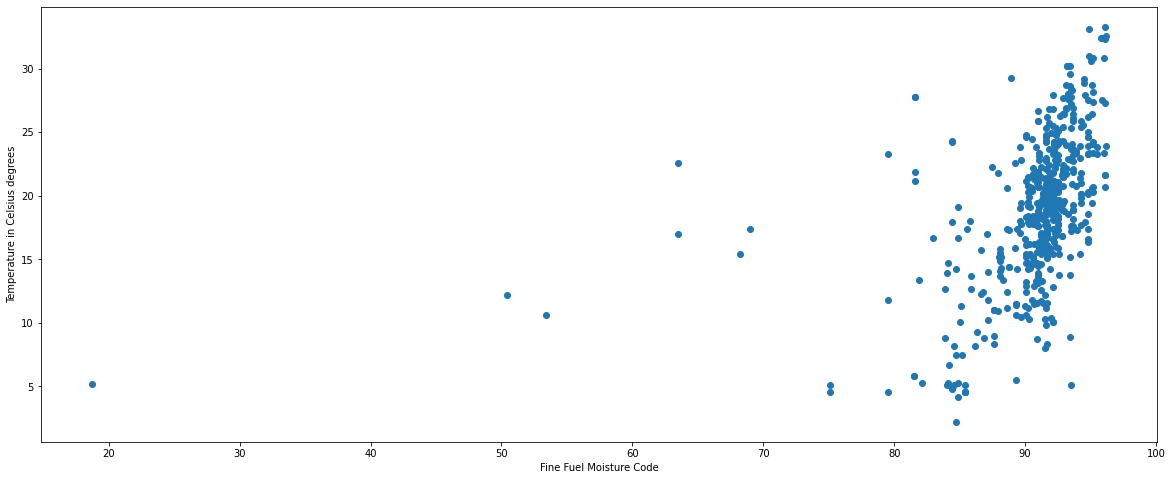

In [6]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['FFMC'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('FFMC'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


Text(0, 0.5, 'Temperature in Celsius degrees')

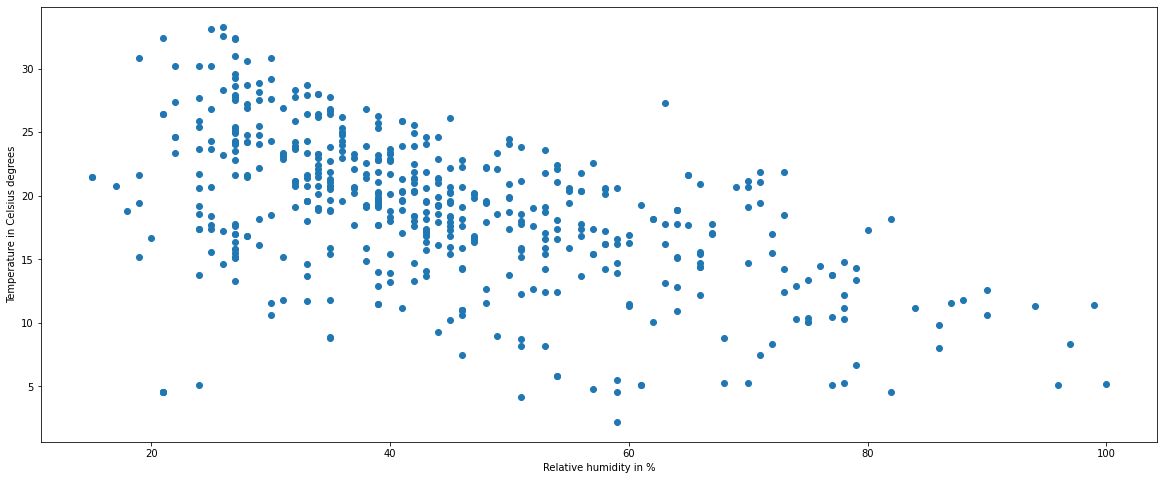

In [7]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['RH'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('RH'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


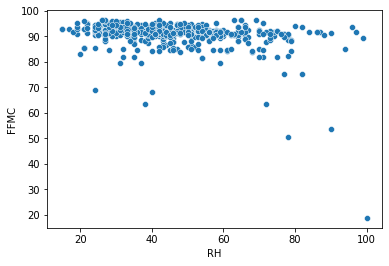

In [8]:
sns.scatterplot( x = dataset["RH"], y = dataset["FFMC"])

# independent variables are uniformly distributed

In [9]:
# Creating training models

In [10]:
### Identifying dependent and independent feature

X = dataset[['FFMC', 'RH']]
y = dataset['temp']

In [11]:
# Model selection

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [14]:
# Standardize the dataset

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
# Performing fit and transformation on train and test data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
## Model training

In [19]:
from sklearn.linear_model import ElasticNet

In [20]:
elasticnet = ElasticNet()

In [21]:
elasticnet.fit(X_train, y_train)

ElasticNet()

In [22]:
## print cofficient and intercept

print("Coefficient: ", elasticnet.coef_)
print("Intercept: ", elasticnet.intercept_)

Coefficient:  [ 0.98120312 -1.70985693]
Intercept:  19.002601156069364


In [23]:
#Prediction for test data
elasticnet_prediction = elasticnet.predict(X_test)

In [24]:
elasticnet_prediction

array([21.24962062, 19.22245352, 19.43888854, 18.33172271, 16.35598955,
       14.48595154, 20.96891258, 19.24102474, 19.76675083, 15.7338151 ,
       20.24822756, 20.90960665, 20.88675575, 21.54248034, 20.58464924,
       16.16240544, 21.07606017, 19.29245868, 20.4303474 , 19.76889068,
       21.24174864, 18.51315514, 14.61381019, 19.38103505, 15.50454101,
       17.97886966, 20.58464924, 18.26103014, 20.21887949, 20.57318497,
       17.97672981, 21.41462169, 17.98169691, 14.99027918, 21.30319442,
       19.9360316 , 14.78454339, 14.6323814 , 18.65530531, 18.659585  ,
       17.78887784, 15.94169073, 19.5088937 , 17.42670037, 19.24102474,
       16.34957001, 21.29104274, 19.17101958, 18.43887029, 19.28963143,
       14.52385901, 19.20602216, 18.95244471, 22.51605539, 20.04959872,
       21.97749022, 21.24748078, 20.57960451, 20.31318799, 21.21033835,
       20.95462106, 20.77104878, 21.55677186, 19.44102839, 19.93389175,
       20.35674996, 19.06387199, 21.09891107, 19.97317402, 21.19

In [25]:
# Assumptions

Text(0, 0.5, 'Test predicted data')

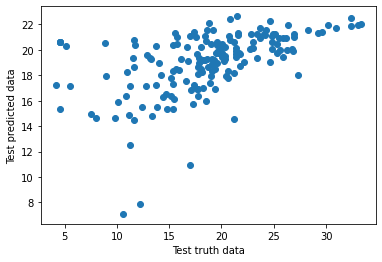

In [26]:
plt.scatter(y_test, elasticnet_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

Text(0, 0.5, 'Test predicted data')

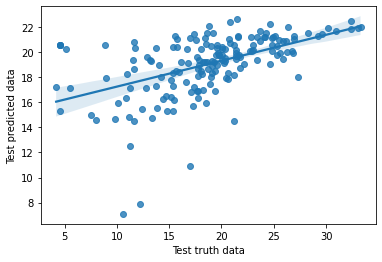

In [27]:
sns.regplot(x = y_test, y = elasticnet_prediction)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

In [28]:
# residuals

residuals = y_test - elasticnet_prediction

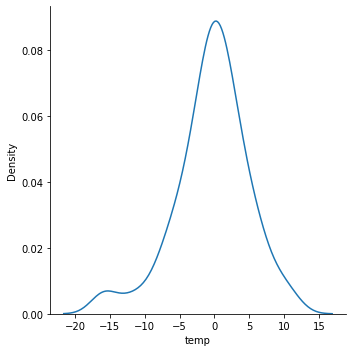

In [29]:
sns.displot(residuals, kind="kde")

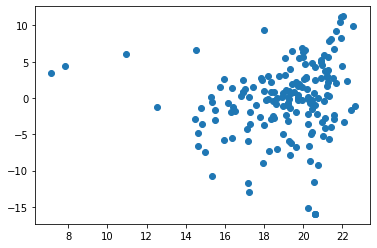

In [30]:
plt.scatter(elasticnet_prediction, residuals)

In [31]:
# Cost function analysis

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
MSE = mean_squared_error(y_test, elasticnet_prediction)
MAE = mean_squared_error(y_test, elasticnet_prediction)
print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Square Error", np.sqrt(MSE))

Mean Squared Error 27.460634545630747
Mean Absolute Error 27.460634545630747
Root Mean Square Error 5.240289547880989


In [34]:
# Performance metrics

In [35]:
from sklearn.metrics import r2_score

In [36]:
score = r2_score(y_test, elasticnet_prediction)
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [37]:
print("R Squared: ", score)
print("Adjusted R Sqaured: ", adj_score)

R Squared:  0.2438463151983814
Adjusted R Sqaured:  0.23484448561740967
